<div>
<img src="https://cdn-images-1.medium.com/max/1024/1*-QTg-_71YF0SVshMEaKZ_g.png" 
   width="400" style="margin: 50px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
<!--NAVIGATION-->
# [PyTorch Primer](1-pytorch.ipynb) | TensorFlow Primer | [PyT vs TF](3-pytorch_vs_tf.ipynb) | [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-TensorFlow)
#### 3. [Basics of TensorFlow](##Basics-of-TensorFlow)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)



# Building TensorFlow

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

# Basics of TensorFlow

#### Tensors and Properties

#### Methods on Tensors

###### Sum

In [1]:
import tensorflow as tf
print(f"Version of TF version: {tf.__version__}")

# Set seed for reproducibility
tf.random.set_seed(0)
# Random Matrix of shape=(3,3)
x = tf.random.normal((3,3), mean=0.0, stddev=1.0, dtype=tf.dtypes.float32,\
                     seed=None,name=None)
print(f"x: {x}")


Version of TF version: 2.6.0
x: [[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]]


###### Reshape : `view` and  `reshape`  methods

In [ ]:
#### Inplace Reshaping
# A vector of length N=10
x = tf.convert_to_tensor([1,2,3,4,5,6,7,8,9,10, 11, 12])

# Reshape in amatrix of shape= (2,5)
print(tf.shape(x).numpy())

x = tf.reshape(x, [4, 3])

print(tf.shape(x).numpy())
print(x)

###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [ ]:
tf.random.set_seed(0)
x = tf.random.normal((10,1))
l1 = tf.norm(x, ord=1)
l2 = tf.norm(x, ord=2)

print(f"L1 Norm of x is:{l1}")
print(f"L2 Norm of x is:{l2}")


###### Computing Norm of a vector without using the method

In [ ]:
n1 = tf.reduce_sum(tf.abs(x))
print(f"L1 norm: is: {n1}")
n2 = tf.sqrt(tf.reduce_sum(x**2))
print(f"L2 norm: is: {n2}")


### Tensors on GPU

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices())
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)




[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Mapping tensors to GPU

In [ ]:
with tf.device('/CPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print(c)


### NumPy ----> TensorFlow ----> NumPy

In [3]:
import numpy as np
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=float)
x_tf = tf.convert_to_tensor(x, dtype=tf.float32)
print("*******NumPy To Tensor*******)")
print("Numpy array is:", x)
print("TF Tensor is:", x_tf)
print("*******Tensor To NumPy*******")
print("TF Tensor is:", x_tf.numpy())


*******NumPy To Tensor*******)
Numpy array is: [[1. 2. 3.]
 [4. 5. 6.]]
TF Tensor is: tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
*******Tensor To NumPy*******
TF Tensor is: [[1. 2. 3.]
 [4. 5. 6.]]


### Eager mode and Graph mode


In [2]:
import tensorflow as tf
import timeit

In [21]:
#tf.config.run_functions_eagerly(False)

x = tf.constant([1., 4., 9., 16., 25.])

## Eager Function
def f_e(x):
    y=x ** 2
    print("Evaluted in Eager Mode y:", y)
    return y 


## Explain tf.print and jit_compile=True
@tf.function(jit_compile=True)
def f_g(x):
    y=x ** 2
    print("Evaluted in Graph Mode y:", y)
    return y 

print("Graph time:", timeit.timeit(lambda: f_g(x), number=1000))
#print("Eager time:", timeit.timeit(lambda: f_e(x), number=1000))


Evaluted in Graph Mode y: Tensor("pow:0", shape=(5,), dtype=float32)
Graph time: 0.19282489699980943


### Function Approximation

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt


batch_size = 50
x = np.linspace(-1, 1, num=batch_size)
x_eval = np.linspace(-0.8, 0.8, num=batch_size).reshape(-1,1)


y = x**2
# Add Random Noise
y = y + 0.05*np.random.normal(np.shape(y))
#y = 2*((y - np.min(y))/(np.max(y) - np.min(y))) - 1
x = x.reshape((-1, 1))
y = y.reshape((-1, 1)) 

y_eval = x_eval**2
#y_eval = 2*((y_eval - np.min(y_eval))/(np.max(y_eval) - np.min(y_eval))) - 1


### Sequential model
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=x.shape[1],\
                             kernel_initializer='he_normal', \
                             activation="tanh"))


model.add(keras.layers.Dense(32, kernel_initializer='he_normal', \
                             activation="tanh"))
print(model.predict(x).shape)
model.add(keras.layers.Dense(1, kernel_initializer='he_normal', activation='linear'))

model.compile(optimizer='adam', 
                  loss='mse',
                  metrics=['mse'])

model.fit(x, y, epochs=5000, batch_size=np.size(x), verbose=1)

y_pred = model.predict(x, batch_size=np.size(x))





(50, 32)
Epoch 1/5000
1/1 [==============================] - 0s 285ms/step - loss: 8.7371 - mse: 8.7371
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.5474 - mse: 8.5474
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.3784 - mse: 8.3784
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.2303 - mse: 8.2303
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.1029 - mse: 8.1029
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.9949 - mse: 7.9949
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.9044 - mse: 7.9044
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8285 - mse: 7.8285
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.7634 - mse: 7.7634
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.7048 - mse: 7.7048
Epoch 11/5000
1/1 [==============================] - 0s 2m

Epoch 88/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5590 - mse: 0.5590
Epoch 89/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5262 - mse: 0.5262
Epoch 90/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4966 - mse: 0.4966
Epoch 91/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4702 - mse: 0.4702
Epoch 92/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4469 - mse: 0.4469
Epoch 93/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4264 - mse: 0.4264
Epoch 94/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4085 - mse: 0.4085
Epoch 95/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3931 - mse: 0.3931
Epoch 96/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3799 - mse: 0.3799
Epoch 97/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3688 - mse: 0.3688
Epoch 98/5000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 5ms/step - loss: 0.2348 - mse: 0.2348
Epoch 175/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2338 - mse: 0.2338
Epoch 176/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2327 - mse: 0.2327
Epoch 177/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2317 - mse: 0.2317
Epoch 178/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2307 - mse: 0.2307
Epoch 179/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2297 - mse: 0.2297
Epoch 180/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2287 - mse: 0.2287
Epoch 181/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2277 - mse: 0.2277
Epoch 182/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2267 - mse: 0.2267
Epoch 183/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2257 - mse: 0.2257
Epoch 184/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 4ms/step - loss: 0.1618 - mse: 0.1618
Epoch 261/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1610 - mse: 0.1610
Epoch 262/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1603 - mse: 0.1603
Epoch 263/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1596 - mse: 0.1596
Epoch 264/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1588 - mse: 0.1588
Epoch 265/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.1581
Epoch 266/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1574 - mse: 0.1574
Epoch 267/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1567 - mse: 0.1567
Epoch 268/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1559 - mse: 0.1559
Epoch 269/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1552 - mse: 0.1552
Epoch 270/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0991 - mse: 0.0991
Epoch 347/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0984 - mse: 0.0984
Epoch 348/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0976 - mse: 0.0976
Epoch 349/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0969 - mse: 0.0969
Epoch 350/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0961 - mse: 0.0961
Epoch 351/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0954 - mse: 0.0954
Epoch 352/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0946 - mse: 0.0946
Epoch 353/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0939 - mse: 0.0939
Epoch 354/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0931 - mse: 0.0931
Epoch 355/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0924 - mse: 0.0924
Epoch 356/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0397 - mse: 0.0397
Epoch 433/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0391 - mse: 0.0391
Epoch 434/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386
Epoch 435/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0381 - mse: 0.0381
Epoch 436/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 437/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0371 - mse: 0.0371
Epoch 438/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0366 - mse: 0.0366
Epoch 439/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0361 - mse: 0.0361
Epoch 440/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0356 - mse: 0.0356
Epoch 441/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0351 - mse: 0.0351
Epoch 442/5000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144
Epoch 519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 520/5000
1/1 [==============================] - ETA: 0s - loss: 0.0141 - mse: 0.014 - 0s 3ms/step - loss: 0.0141 - mse: 0.0141
Epoch 521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140 - mse: 0.0140
Epoch 522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139 - mse: 0.0139
Epoch 523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0138 - mse: 0.0138
Epoch 524/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - mse: 0.0137
Epoch 525/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136
Epoch 526/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135
Epoch 527/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134
Epoch 528/5000
1/1 [=======

Epoch 604/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0086 - mse: 0.0086
Epoch 605/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0086 - mse: 0.0086
Epoch 606/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0085 - mse: 0.0085
Epoch 607/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0085 - mse: 0.0085
Epoch 608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0085 - mse: 0.0085
Epoch 609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.0084
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0084 - mse: 0.0084
Epoch 611/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 0.0084
Epoch 612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0083 - mse: 0.0083
Epoch 614/5000
1/1 [==============================

1/1 [==============================] - 0s 3ms/step - loss: 0.0062 - mse: 0.0062
Epoch 691/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0061 - mse: 0.0061
Epoch 692/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0061 - mse: 0.0061
Epoch 693/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061
Epoch 694/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061
Epoch 695/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061
Epoch 696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 697/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 698/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0060 - mse: 0.0060
Epoch 699/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 700/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046
Epoch 777/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 778/5000
1/1 [==============================] - ETA: 0s - loss: 0.0046 - mse: 0.004 - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 779/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046
Epoch 780/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0046 - mse: 0.0046
Epoch 781/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0046 - mse: 0.0046
Epoch 782/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045
Epoch 783/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045
Epoch 784/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - mse: 0.0045
Epoch 785/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - mse: 0.0045
Epoch 786/5000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036
Epoch 862/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0036 - mse: 0.0036
Epoch 863/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036
Epoch 864/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0036 - mse: 0.0036
Epoch 865/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 866/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 867/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 868/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035
Epoch 869/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 870/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 871/5000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 948/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 949/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 950/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 951/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 952/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 953/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 954/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 955/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 956/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028
Epoch 957/5000
1/1 [==============================] - 0s 2ms/step

Epoch 1033/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1034/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1035/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024
Epoch 1036/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1037/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1038/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1039/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1040/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1041/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1042/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - mse: 0.0023
Epoch 1043/5000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1124/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1125/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1126/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1127/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 1128/5000
1/1 [==============================] - 0

Epoch 1203/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1204/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1205/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1207/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1208/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018
Epoch 1210/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017
Epoch 1211/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0017
Epoch 1212/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017 - mse: 0.0017
Epoch 1213/5000
1/1 [===================

1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1289/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1290/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1291/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1292/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1293/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1294/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1295/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1296/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1297/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1298/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1374/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1375/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1376/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1377/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1378/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1379/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1380/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1381/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1382/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1383/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1459/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1460/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1461/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1462/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1463/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1464/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1465/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1466/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1467/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1468/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1544/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1545/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1546/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1547/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1548/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1549/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1550/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1551/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1552/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1553/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1629/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1630/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1631/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1633/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1634/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1635/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1636/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1637/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1638/5000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 9.6816e-04 - mse: 9.6816e-04
Epoch 1712/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.6700e-04 - mse: 9.6700e-04
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.6585e-04 - mse: 9.6585e-04
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.6469e-04 - mse: 9.6469e-04
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.6353e-04 - mse: 9.6353e-04
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.6238e-04 - mse: 9.6238e-04
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.6123e-04 - mse: 9.6123e-04
Epoch 1718/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.6007e-04 - mse: 9.6007e-04
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.5892e-04 - mse: 9.5892e-04
Epoch 1720/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.577

1/1 [==============================] - 0s 3ms/step - loss: 8.7968e-04 - mse: 8.7968e-04
Epoch 1790/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7856e-04 - mse: 8.7856e-04
Epoch 1791/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.7745e-04 - mse: 8.7745e-04
Epoch 1792/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.7634e-04 - mse: 8.7634e-04
Epoch 1793/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.7523e-04 - mse: 8.7523e-04
Epoch 1794/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7412e-04 - mse: 8.7412e-04
Epoch 1795/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7301e-04 - mse: 8.7301e-04
Epoch 1796/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.7190e-04 - mse: 8.7190e-04
Epoch 1797/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7079e-04 - mse: 8.7079e-04
Epoch 1798/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.696

1/1 [==============================] - 0s 2ms/step - loss: 7.9446e-04 - mse: 7.9446e-04
Epoch 1868/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.9339e-04 - mse: 7.9339e-04
Epoch 1869/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.9232e-04 - mse: 7.9232e-04
Epoch 1870/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.9125e-04 - mse: 7.9125e-04
Epoch 1871/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.9018e-04 - mse: 7.9018e-04
Epoch 1872/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8910e-04 - mse: 7.8910e-04
Epoch 1873/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.8804e-04 - mse: 7.8804e-04
Epoch 1874/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.8697e-04 - mse: 7.8697e-04
Epoch 1875/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.8590e-04 - mse: 7.8590e-04
Epoch 1876/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.848

1/1 [==============================] - 0s 3ms/step - loss: 7.1256e-04 - mse: 7.1256e-04
Epoch 1946/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1154e-04 - mse: 7.1154e-04
Epoch 1947/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1051e-04 - mse: 7.1051e-04
Epoch 1948/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0949e-04 - mse: 7.0949e-04
Epoch 1949/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0846e-04 - mse: 7.0846e-04
Epoch 1950/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0744e-04 - mse: 7.0744e-04
Epoch 1951/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0641e-04 - mse: 7.0641e-04
Epoch 1952/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0539e-04 - mse: 7.0539e-04
Epoch 1953/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0437e-04 - mse: 7.0437e-04
Epoch 1954/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.033

1/1 [==============================] - 0s 2ms/step - loss: 6.3452e-04 - mse: 6.3452e-04
Epoch 2024/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3354e-04 - mse: 6.3354e-04
Epoch 2025/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3257e-04 - mse: 6.3257e-04
Epoch 2026/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3160e-04 - mse: 6.3160e-04
Epoch 2027/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.3063e-04 - mse: 6.3063e-04
Epoch 2028/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.2966e-04 - mse: 6.2966e-04
Epoch 2029/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.2869e-04 - mse: 6.2869e-04
Epoch 2030/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.2772e-04 - mse: 6.2772e-04
Epoch 2031/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.2676e-04 - mse: 6.2676e-04
Epoch 2032/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.257

1/1 [==============================] - 0s 3ms/step - loss: 5.6099e-04 - mse: 5.6099e-04
Epoch 2102/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.6008e-04 - mse: 5.6008e-04
Epoch 2103/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5917e-04 - mse: 5.5917e-04
Epoch 2104/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5826e-04 - mse: 5.5826e-04
Epoch 2105/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5735e-04 - mse: 5.5735e-04
Epoch 2106/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5644e-04 - mse: 5.5644e-04
Epoch 2107/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.5554e-04 - mse: 5.5554e-04
Epoch 2108/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5463e-04 - mse: 5.5463e-04
Epoch 2109/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.5372e-04 - mse: 5.5372e-04
Epoch 2110/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.528

1/1 [==============================] - 0s 2ms/step - loss: 4.9254e-04 - mse: 4.9254e-04
Epoch 2180/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.9169e-04 - mse: 4.9169e-04
Epoch 2181/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9085e-04 - mse: 4.9085e-04
Epoch 2182/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.9001e-04 - mse: 4.9001e-04
Epoch 2183/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8917e-04 - mse: 4.8917e-04
Epoch 2184/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8833e-04 - mse: 4.8833e-04
Epoch 2185/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.8749e-04 - mse: 4.8749e-04
Epoch 2186/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.8665e-04 - mse: 4.8665e-04
Epoch 2187/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8582e-04 - mse: 4.8582e-04
Epoch 2188/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.849

1/1 [==============================] - 0s 2ms/step - loss: 4.2952e-04 - mse: 4.2952e-04
Epoch 2258/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2875e-04 - mse: 4.2875e-04
Epoch 2259/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.2798e-04 - mse: 4.2798e-04
Epoch 2260/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.2721e-04 - mse: 4.2721e-04
Epoch 2261/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2644e-04 - mse: 4.2644e-04
Epoch 2262/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2567e-04 - mse: 4.2567e-04
Epoch 2263/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2490e-04 - mse: 4.2490e-04
Epoch 2264/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2414e-04 - mse: 4.2414e-04
Epoch 2265/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2337e-04 - mse: 4.2337e-04
Epoch 2266/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.226

1/1 [==============================] - 0s 3ms/step - loss: 3.7214e-04 - mse: 3.7214e-04
Epoch 2336/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7145e-04 - mse: 3.7145e-04
Epoch 2337/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7075e-04 - mse: 3.7075e-04
Epoch 2338/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7005e-04 - mse: 3.7005e-04
Epoch 2339/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6936e-04 - mse: 3.6936e-04
Epoch 2340/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.6866e-04 - mse: 3.6866e-04
Epoch 2341/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.6797e-04 - mse: 3.6797e-04
Epoch 2342/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6727e-04 - mse: 3.6727e-04
Epoch 2343/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.6658e-04 - mse: 3.6658e-04
Epoch 2344/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.658

1/1 [==============================] - 0s 2ms/step - loss: 3.2050e-04 - mse: 3.2050e-04
Epoch 2414/5000
1/1 [==============================] - 0s 4ms/step - loss: 3.1988e-04 - mse: 3.1988e-04
Epoch 2415/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1925e-04 - mse: 3.1925e-04
Epoch 2416/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1863e-04 - mse: 3.1863e-04
Epoch 2417/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1801e-04 - mse: 3.1801e-04
Epoch 2418/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1739e-04 - mse: 3.1739e-04
Epoch 2419/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1677e-04 - mse: 3.1677e-04
Epoch 2420/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1615e-04 - mse: 3.1615e-04
Epoch 2421/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1553e-04 - mse: 3.1553e-04
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.149

1/1 [==============================] - 0s 2ms/step - loss: 2.7458e-04 - mse: 2.7458e-04
Epoch 2492/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7403e-04 - mse: 2.7403e-04
Epoch 2493/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7348e-04 - mse: 2.7348e-04
Epoch 2494/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7293e-04 - mse: 2.7293e-04
Epoch 2495/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7238e-04 - mse: 2.7238e-04
Epoch 2496/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7183e-04 - mse: 2.7183e-04
Epoch 2497/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7128e-04 - mse: 2.7128e-04
Epoch 2498/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7074e-04 - mse: 2.7074e-04
Epoch 2499/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7019e-04 - mse: 2.7019e-04
Epoch 2500/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.696

1/1 [==============================] - 0s 3ms/step - loss: 2.3427e-04 - mse: 2.3427e-04
Epoch 2570/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3379e-04 - mse: 2.3379e-04
Epoch 2571/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3331e-04 - mse: 2.3331e-04
Epoch 2572/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3283e-04 - mse: 2.3283e-04
Epoch 2573/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3235e-04 - mse: 2.3235e-04
Epoch 2574/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3187e-04 - mse: 2.3187e-04
Epoch 2575/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3140e-04 - mse: 2.3140e-04
Epoch 2576/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.3092e-04 - mse: 2.3092e-04
Epoch 2577/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3045e-04 - mse: 2.3045e-04
Epoch 2578/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.299

1/1 [==============================] - 0s 3ms/step - loss: 1.9936e-04 - mse: 1.9936e-04
Epoch 2648/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9894e-04 - mse: 1.9894e-04
Epoch 2649/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9853e-04 - mse: 1.9853e-04
Epoch 2650/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9812e-04 - mse: 1.9812e-04
Epoch 2651/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9771e-04 - mse: 1.9771e-04
Epoch 2652/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9730e-04 - mse: 1.9730e-04
Epoch 2653/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9689e-04 - mse: 1.9689e-04
Epoch 2654/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9648e-04 - mse: 1.9648e-04
Epoch 2655/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9607e-04 - mse: 1.9607e-04
Epoch 2656/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.956

1/1 [==============================] - 0s 2ms/step - loss: 1.6953e-04 - mse: 1.6953e-04
Epoch 2726/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6918e-04 - mse: 1.6918e-04
Epoch 2727/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6883e-04 - mse: 1.6883e-04
Epoch 2728/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6848e-04 - mse: 1.6848e-04
Epoch 2729/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6813e-04 - mse: 1.6813e-04
Epoch 2730/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6778e-04 - mse: 1.6778e-04
Epoch 2731/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.6743e-04 - mse: 1.6743e-04
Epoch 2732/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6709e-04 - mse: 1.6709e-04
Epoch 2733/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.6674e-04 - mse: 1.6674e-04
Epoch 2734/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.664

1/1 [==============================] - 0s 2ms/step - loss: 1.4438e-04 - mse: 1.4438e-04
Epoch 2804/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4409e-04 - mse: 1.4409e-04
Epoch 2805/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4380e-04 - mse: 1.4380e-04
Epoch 2806/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4350e-04 - mse: 1.4350e-04
Epoch 2807/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4321e-04 - mse: 1.4321e-04
Epoch 2808/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4292e-04 - mse: 1.4292e-04
Epoch 2809/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4263e-04 - mse: 1.4263e-04
Epoch 2810/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4234e-04 - mse: 1.4234e-04
Epoch 2811/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4205e-04 - mse: 1.4205e-04
Epoch 2812/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.417

1/1 [==============================] - 0s 3ms/step - loss: 1.2345e-04 - mse: 1.2345e-04
Epoch 2882/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2321e-04 - mse: 1.2321e-04
Epoch 2883/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2297e-04 - mse: 1.2297e-04
Epoch 2884/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2273e-04 - mse: 1.2273e-04
Epoch 2885/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2249e-04 - mse: 1.2249e-04
Epoch 2886/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.2225e-04 - mse: 1.2225e-04
Epoch 2887/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2200e-04 - mse: 1.2200e-04
Epoch 2888/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2176e-04 - mse: 1.2176e-04
Epoch 2889/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2153e-04 - mse: 1.2153e-04
Epoch 2890/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.212

1/1 [==============================] - 0s 2ms/step - loss: 1.0623e-04 - mse: 1.0623e-04
Epoch 2960/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0603e-04 - mse: 1.0603e-04
Epoch 2961/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0583e-04 - mse: 1.0583e-04
Epoch 2962/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0564e-04 - mse: 1.0564e-04
Epoch 2963/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0544e-04 - mse: 1.0544e-04
Epoch 2964/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0524e-04 - mse: 1.0524e-04
Epoch 2965/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0505e-04 - mse: 1.0505e-04
Epoch 2966/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0485e-04 - mse: 1.0485e-04
Epoch 2967/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0465e-04 - mse: 1.0465e-04
Epoch 2968/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.044

1/1 [==============================] - 0s 4ms/step - loss: 9.2194e-05 - mse: 9.2194e-05
Epoch 3038/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.2032e-05 - mse: 9.2032e-05
Epoch 3039/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.1871e-05 - mse: 9.1871e-05
Epoch 3040/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.1711e-05 - mse: 9.1711e-05
Epoch 3041/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.1550e-05 - mse: 9.1550e-05
Epoch 3042/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.1388e-05 - mse: 9.1388e-05
Epoch 3043/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.1230e-05 - mse: 9.1230e-05
Epoch 3044/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.1071e-05 - mse: 9.1071e-05
Epoch 3045/5000
1/1 [==============================] - 0s 2ms/step - loss: 9.0912e-05 - mse: 9.0912e-05
Epoch 3046/5000
1/1 [==============================] - 0s 3ms/step - loss: 9.075

1/1 [==============================] - 0s 2ms/step - loss: 8.0821e-05 - mse: 8.0821e-05
Epoch 3116/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.0689e-05 - mse: 8.0689e-05
Epoch 3117/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.0561e-05 - mse: 8.0561e-05
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.0429e-05 - mse: 8.0429e-05
Epoch 3119/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.0300e-05 - mse: 8.0300e-05
Epoch 3120/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.0170e-05 - mse: 8.0170e-05
Epoch 3121/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.0042e-05 - mse: 8.0042e-05
Epoch 3122/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.9914e-05 - mse: 7.9914e-05
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.9785e-05 - mse: 7.9785e-05
Epoch 3124/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.965

1/1 [==============================] - 0s 3ms/step - loss: 7.1631e-05 - mse: 7.1631e-05
Epoch 3194/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1526e-05 - mse: 7.1526e-05
Epoch 3195/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1421e-05 - mse: 7.1421e-05
Epoch 3196/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1316e-05 - mse: 7.1316e-05
Epoch 3197/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.1211e-05 - mse: 7.1211e-05
Epoch 3198/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.1107e-05 - mse: 7.1107e-05
Epoch 3199/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.1002e-05 - mse: 7.1002e-05
Epoch 3200/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0898e-05 - mse: 7.0898e-05
Epoch 3201/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.0795e-05 - mse: 7.0795e-05
Epoch 3202/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.069

1/1 [==============================] - 0s 2ms/step - loss: 6.4195e-05 - mse: 6.4195e-05
Epoch 3272/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.4109e-05 - mse: 6.4109e-05
Epoch 3273/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.4023e-05 - mse: 6.4023e-05
Epoch 3274/5000
1/1 [==============================] - 0s 4ms/step - loss: 6.3939e-05 - mse: 6.3939e-05
Epoch 3275/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3852e-05 - mse: 6.3852e-05
Epoch 3276/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3768e-05 - mse: 6.3768e-05
Epoch 3277/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3684e-05 - mse: 6.3684e-05
Epoch 3278/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.3600e-05 - mse: 6.3600e-05
Epoch 3279/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.3515e-05 - mse: 6.3515e-05
Epoch 3280/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.343

1/1 [==============================] - 0s 3ms/step - loss: 5.8136e-05 - mse: 5.8136e-05
Epoch 3350/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.8066e-05 - mse: 5.8066e-05
Epoch 3351/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.7996e-05 - mse: 5.7996e-05
Epoch 3352/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7926e-05 - mse: 5.7926e-05
Epoch 3353/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.7858e-05 - mse: 5.7858e-05
Epoch 3354/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.7788e-05 - mse: 5.7788e-05
Epoch 3355/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7718e-05 - mse: 5.7718e-05
Epoch 3356/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.7650e-05 - mse: 5.7650e-05
Epoch 3357/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.7579e-05 - mse: 5.7579e-05
Epoch 3358/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.751

1/1 [==============================] - 0s 3ms/step - loss: 5.3147e-05 - mse: 5.3147e-05
Epoch 3428/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.3088e-05 - mse: 5.3088e-05
Epoch 3429/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.3031e-05 - mse: 5.3031e-05
Epoch 3430/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.2973e-05 - mse: 5.2973e-05
Epoch 3431/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.2915e-05 - mse: 5.2915e-05
Epoch 3432/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.2857e-05 - mse: 5.2857e-05
Epoch 3433/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.2799e-05 - mse: 5.2799e-05
Epoch 3434/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.2742e-05 - mse: 5.2742e-05
Epoch 3435/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.2686e-05 - mse: 5.2686e-05
Epoch 3436/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.262

1/1 [==============================] - 0s 3ms/step - loss: 4.8978e-05 - mse: 4.8978e-05
Epoch 3506/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8929e-05 - mse: 4.8929e-05
Epoch 3507/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8879e-05 - mse: 4.8879e-05
Epoch 3508/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.8831e-05 - mse: 4.8831e-05
Epoch 3509/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.8782e-05 - mse: 4.8782e-05
Epoch 3510/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.8733e-05 - mse: 4.8733e-05
Epoch 3511/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8685e-05 - mse: 4.8685e-05
Epoch 3512/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.8637e-05 - mse: 4.8637e-05
Epoch 3513/5000
1/1 [==============================] - 0s 4ms/step - loss: 4.8589e-05 - mse: 4.8589e-05
Epoch 3514/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.854

1/1 [==============================] - 0s 2ms/step - loss: 4.5546e-05 - mse: 4.5546e-05
Epoch 3584/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.5659e-05 - mse: 4.5659e-05
Epoch 3585/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.5745e-05 - mse: 4.5745e-05
Epoch 3586/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.5719e-05 - mse: 4.5719e-05
Epoch 3587/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.5583e-05 - mse: 4.5583e-05
Epoch 3588/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.5406e-05 - mse: 4.5406e-05
Epoch 3589/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.5267e-05 - mse: 4.5267e-05
Epoch 3590/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.5209e-05 - mse: 4.5209e-05
Epoch 3591/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.5220e-05 - mse: 4.5220e-05
Epoch 3592/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.525

1/1 [==============================] - 0s 2ms/step - loss: 4.2510e-05 - mse: 4.2510e-05
Epoch 3662/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.2473e-05 - mse: 4.2473e-05
Epoch 3663/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2438e-05 - mse: 4.2438e-05
Epoch 3664/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.2402e-05 - mse: 4.2402e-05
Epoch 3665/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.2366e-05 - mse: 4.2366e-05
Epoch 3666/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2331e-05 - mse: 4.2331e-05
Epoch 3667/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2294e-05 - mse: 4.2294e-05
Epoch 3668/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.2260e-05 - mse: 4.2260e-05
Epoch 3669/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.2223e-05 - mse: 4.2223e-05
Epoch 3670/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.218

1/1 [==============================] - 0s 2ms/step - loss: 3.9970e-05 - mse: 3.9970e-05
Epoch 3740/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.0037e-05 - mse: 4.0037e-05
Epoch 3741/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.0660e-05 - mse: 4.0660e-05
Epoch 3742/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.1244e-05 - mse: 4.1244e-05
Epoch 3743/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1335e-05 - mse: 4.1335e-05
Epoch 3744/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.0896e-05 - mse: 4.0896e-05
Epoch 3745/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.0245e-05 - mse: 4.0245e-05
Epoch 3746/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.9776e-05 - mse: 3.9776e-05
Epoch 3747/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.9693e-05 - mse: 3.9693e-05
Epoch 3748/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.992

1/1 [==============================] - 0s 2ms/step - loss: 3.7630e-05 - mse: 3.7630e-05
Epoch 3818/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7602e-05 - mse: 3.7602e-05
Epoch 3819/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7575e-05 - mse: 3.7575e-05
Epoch 3820/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.7547e-05 - mse: 3.7547e-05
Epoch 3821/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7519e-05 - mse: 3.7519e-05
Epoch 3822/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7491e-05 - mse: 3.7491e-05
Epoch 3823/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.7464e-05 - mse: 3.7464e-05
Epoch 3824/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7435e-05 - mse: 3.7435e-05
Epoch 3825/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.7408e-05 - mse: 3.7408e-05
Epoch 3826/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.737

1/1 [==============================] - 0s 2ms/step - loss: 3.6990e-05 - mse: 3.6990e-05
Epoch 3896/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.6813e-05 - mse: 3.6813e-05
Epoch 3897/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4288e-05 - mse: 4.4288e-05
Epoch 3898/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.1034e-05 - mse: 5.1034e-05
Epoch 3899/5000
1/1 [==============================] - 0s 3ms/step - loss: 5.0790e-05 - mse: 5.0790e-05
Epoch 3900/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.4271e-05 - mse: 4.4271e-05
Epoch 3901/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.7416e-05 - mse: 3.7416e-05
Epoch 3902/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.5510e-05 - mse: 3.5510e-05
Epoch 3903/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.8687e-05 - mse: 3.8687e-05
Epoch 3904/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.279

1/1 [==============================] - 0s 3ms/step - loss: 3.3768e-05 - mse: 3.3768e-05
Epoch 3974/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3749e-05 - mse: 3.3749e-05
Epoch 3975/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3728e-05 - mse: 3.3728e-05
Epoch 3976/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3705e-05 - mse: 3.3705e-05
Epoch 3977/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3682e-05 - mse: 3.3682e-05
Epoch 3978/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3658e-05 - mse: 3.3658e-05
Epoch 3979/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3633e-05 - mse: 3.3633e-05
Epoch 3980/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3610e-05 - mse: 3.3610e-05
Epoch 3981/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.3588e-05 - mse: 3.3588e-05
Epoch 3982/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.356

1/1 [==============================] - 0s 2ms/step - loss: 3.2071e-05 - mse: 3.2071e-05
Epoch 4052/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.2051e-05 - mse: 3.2051e-05
Epoch 4053/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.2029e-05 - mse: 3.2029e-05
Epoch 4054/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.2009e-05 - mse: 3.2009e-05
Epoch 4055/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1988e-05 - mse: 3.1988e-05
Epoch 4056/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1966e-05 - mse: 3.1966e-05
Epoch 4057/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1945e-05 - mse: 3.1945e-05
Epoch 4058/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1925e-05 - mse: 3.1925e-05
Epoch 4059/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1904e-05 - mse: 3.1904e-05
Epoch 4060/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.188

1/1 [==============================] - 0s 2ms/step - loss: 3.6106e-05 - mse: 3.6106e-05
Epoch 4130/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1414e-05 - mse: 3.1414e-05
Epoch 4131/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.0956e-05 - mse: 3.0956e-05
Epoch 4132/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.4024e-05 - mse: 3.4024e-05
Epoch 4133/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.5884e-05 - mse: 3.5884e-05
Epoch 4134/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.4177e-05 - mse: 3.4177e-05
Epoch 4135/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.1271e-05 - mse: 3.1271e-05
Epoch 4136/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.0528e-05 - mse: 3.0528e-05
Epoch 4137/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.2139e-05 - mse: 3.2139e-05
Epoch 4138/5000
1/1 [==============================] - 0s 3ms/step - loss: 3.351

1/1 [==============================] - 0s 2ms/step - loss: 2.9187e-05 - mse: 2.9187e-05
Epoch 4208/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9170e-05 - mse: 2.9170e-05
Epoch 4209/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9152e-05 - mse: 2.9152e-05
Epoch 4210/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9133e-05 - mse: 2.9133e-05
Epoch 4211/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9116e-05 - mse: 2.9116e-05
Epoch 4212/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9100e-05 - mse: 2.9100e-05
Epoch 4213/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9083e-05 - mse: 2.9083e-05
Epoch 4214/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9066e-05 - mse: 2.9066e-05
Epoch 4215/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.9049e-05 - mse: 2.9049e-05
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.903

1/1 [==============================] - 0s 2ms/step - loss: 2.7873e-05 - mse: 2.7873e-05
Epoch 4286/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7856e-05 - mse: 2.7856e-05
Epoch 4287/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7839e-05 - mse: 2.7839e-05
Epoch 4288/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7823e-05 - mse: 2.7823e-05
Epoch 4289/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7807e-05 - mse: 2.7807e-05
Epoch 4290/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7790e-05 - mse: 2.7790e-05
Epoch 4291/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.7773e-05 - mse: 2.7773e-05
Epoch 4292/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7757e-05 - mse: 2.7757e-05
Epoch 4293/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7741e-05 - mse: 2.7741e-05
Epoch 4294/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.772

1/1 [==============================] - 0s 3ms/step - loss: 4.8162e-05 - mse: 4.8162e-05
Epoch 4364/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.0942e-05 - mse: 6.0942e-05
Epoch 4365/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.0240e-05 - mse: 8.0240e-05
Epoch 4366/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0769e-04 - mse: 1.0769e-04
Epoch 4367/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.4217e-04 - mse: 1.4217e-04
Epoch 4368/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7725e-04 - mse: 1.7725e-04
Epoch 4369/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9725e-04 - mse: 1.9725e-04
Epoch 4370/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8477e-04 - mse: 1.8477e-04
Epoch 4371/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.3490e-04 - mse: 1.3490e-04
Epoch 4372/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.135

1/1 [==============================] - 0s 2ms/step - loss: 2.5580e-05 - mse: 2.5580e-05
Epoch 4442/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5522e-05 - mse: 2.5522e-05
Epoch 4443/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5474e-05 - mse: 2.5474e-05
Epoch 4444/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5454e-05 - mse: 2.5454e-05
Epoch 4445/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5458e-05 - mse: 2.5458e-05
Epoch 4446/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5467e-05 - mse: 2.5467e-05
Epoch 4447/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5464e-05 - mse: 2.5464e-05
Epoch 4448/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.5442e-05 - mse: 2.5442e-05
Epoch 4449/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5409e-05 - mse: 2.5409e-05
Epoch 4450/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.537

1/1 [==============================] - 0s 2ms/step - loss: 2.4407e-05 - mse: 2.4407e-05
Epoch 4520/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4393e-05 - mse: 2.4393e-05
Epoch 4521/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4379e-05 - mse: 2.4379e-05
Epoch 4522/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4366e-05 - mse: 2.4366e-05
Epoch 4523/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4353e-05 - mse: 2.4353e-05
Epoch 4524/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4339e-05 - mse: 2.4339e-05
Epoch 4525/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4325e-05 - mse: 2.4325e-05
Epoch 4526/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4311e-05 - mse: 2.4311e-05
Epoch 4527/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4297e-05 - mse: 2.4297e-05
Epoch 4528/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.428

1/1 [==============================] - 0s 3ms/step - loss: 8.9702e-05 - mse: 8.9702e-05
Epoch 4598/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.2222e-04 - mse: 1.2222e-04
Epoch 4599/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.0865e-04 - mse: 1.0865e-04
Epoch 4600/5000
1/1 [==============================] - 0s 2ms/step - loss: 6.2814e-05 - mse: 6.2814e-05
Epoch 4601/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7277e-05 - mse: 2.7277e-05
Epoch 4602/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.9063e-05 - mse: 2.9063e-05
Epoch 4603/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6013e-05 - mse: 5.6013e-05
Epoch 4604/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.4967e-05 - mse: 7.4967e-05
Epoch 4605/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.6194e-05 - mse: 6.6194e-05
Epoch 4606/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.049

Epoch 4675/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2435e-05 - mse: 2.2435e-05
Epoch 4676/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2437e-05 - mse: 2.2437e-05
Epoch 4677/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.2432e-05 - mse: 2.2432e-05
Epoch 4678/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2416e-05 - mse: 2.2416e-05
Epoch 4679/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2391e-05 - mse: 2.2391e-05
Epoch 4680/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.2368e-05 - mse: 2.2368e-05
Epoch 4681/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2354e-05 - mse: 2.2354e-05
Epoch 4682/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2346e-05 - mse: 2.2346e-05
Epoch 4683/5000
1/1 [==============================] - 0s 4ms/step - loss: 2.2341e-05 - mse: 2.2341e-05
Epoch 4684/5000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 3ms/step - loss: 2.1501e-05 - mse: 2.1501e-05
Epoch 4754/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1490e-05 - mse: 2.1490e-05
Epoch 4755/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1478e-05 - mse: 2.1478e-05
Epoch 4756/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1466e-05 - mse: 2.1466e-05
Epoch 4757/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1454e-05 - mse: 2.1454e-05
Epoch 4758/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1442e-05 - mse: 2.1442e-05
Epoch 4759/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.1431e-05 - mse: 2.1431e-05
Epoch 4760/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1419e-05 - mse: 2.1419e-05
Epoch 4761/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.1408e-05 - mse: 2.1408e-05
Epoch 4762/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.139

1/1 [==============================] - 0s 2ms/step - loss: 5.6838e-05 - mse: 5.6838e-05
Epoch 4832/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.1225e-05 - mse: 8.1225e-05
Epoch 4833/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.1984e-04 - mse: 1.1984e-04
Epoch 4834/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.7615e-04 - mse: 1.7615e-04
Epoch 4835/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.4752e-04 - mse: 2.4752e-04
Epoch 4836/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1370e-04 - mse: 3.1370e-04
Epoch 4837/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.3513e-04 - mse: 3.3513e-04
Epoch 4838/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.7377e-04 - mse: 2.7377e-04
Epoch 4839/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.4922e-04 - mse: 1.4922e-04
Epoch 4840/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.311

1/1 [==============================] - 0s 3ms/step - loss: 1.9932e-05 - mse: 1.9932e-05
Epoch 4910/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.9928e-05 - mse: 1.9928e-05
Epoch 4911/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9858e-05 - mse: 1.9858e-05
Epoch 4912/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9783e-05 - mse: 1.9783e-05
Epoch 4913/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9758e-05 - mse: 1.9758e-05
Epoch 4914/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9781e-05 - mse: 1.9781e-05
Epoch 4915/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9808e-05 - mse: 1.9808e-05
Epoch 4916/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.9802e-05 - mse: 1.9802e-05
Epoch 4917/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.9762e-05 - mse: 1.9762e-05
Epoch 4918/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.971

1/1 [==============================] - 0s 2ms/step - loss: 1.9004e-05 - mse: 1.9004e-05
Epoch 4988/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8994e-05 - mse: 1.8994e-05
Epoch 4989/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8984e-05 - mse: 1.8984e-05
Epoch 4990/5000
1/1 [==============================] - 0s 4ms/step - loss: 1.8974e-05 - mse: 1.8974e-05
Epoch 4991/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8964e-05 - mse: 1.8964e-05
Epoch 4992/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8953e-05 - mse: 1.8953e-05
Epoch 4993/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8942e-05 - mse: 1.8942e-05
Epoch 4994/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.8933e-05 - mse: 1.8933e-05
Epoch 4995/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.8923e-05 - mse: 1.8923e-05
Epoch 4996/5000
1/1 [==============================] - 0s 2ms/step - loss: 1.891

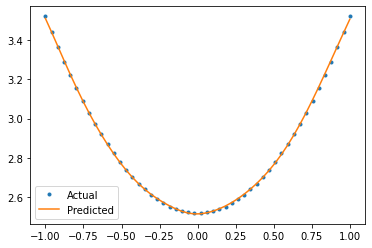

In [24]:
plt.plot(x, y, ".", label="Actual")
plt.plot(x, y_pred, "-", label="Predicted")
plt.legend()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
